In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Filepaths
description_path = "/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/movie-genre-classification/dataset-files/description.txt"
test_data_path = "/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/movie-genre-classification/dataset-files/test_data.txt"
test_data_sol_path = "/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/movie-genre-classification/dataset-files/test_data_solution.txt"
train_data_path = "/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/movie-genre-classification/dataset-files/train_data.txt"


In [ ]:
# Function to read txt file
def read_txt_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()
    return content

In [ ]:
# Reading description file
description = read_txt_file(description_path)
print(description)

Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


Here we see that in order to create data frame we will use delimiter parameter ```sep=':::'``` in ```pd.read_csv()``` function.

In [ ]:
# creating train_data dataframe

train_df = pd.read_csv(train_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
train_df.columns = ['Id','Title','Genre','Description']

print(train_df.info())
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
# creating test_data dataframe

test_df = pd.read_csv(test_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_df.columns = ['Id','Title','Description']

print(test_df.info())
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
# creating test_data_solution dataframe

test_sol_df = pd.read_csv(test_data_sol_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_sol_df.columns = ['Id','Title','Genre','Description']

print(test_sol_df.info())
print(type(test_sol_df))
test_sol_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# **DATA CLEANING**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


Here we see that ```Titles``` won't help in classifying the ```Genre``` as many of them are in other languages than English. So we will only use ```Description``` to extract features from.

In [ ]:
# missing values
train_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

No missing value in the dataset

In [ ]:
# check for duplicate values
train_df.duplicated().sum()

0

No duplicate values in the dataset

In [ ]:
# output classes
output_categories = train_df.Genre.unique()
print(len(output_categories))
output_categories

27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [ ]:
# Getting all the classes (Genres)
genres = train_df.Genre
print(genres)

0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


In [ ]:
# Label encoding the output categories
le = LabelEncoder()
le.fit(genres)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [ ]:
genres = le.transform(genres)
genres

array([ 8, 24,  1, ...,  7,  5, 12])

In [ ]:
train_df['Labeled Genre'] = genres

In [ ]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [ ]:
cat = le.inverse_transform([2])
# cat = str(cat)
print(cat[0])
print(type(cat[0]))

 adventure 
<class 'str'>


In [ ]:
# print(cat)

# **PERFORMING EDA**

In [ ]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [ ]:
train_df['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

In order to better visualize the distribution of output categories we plot the pie chart

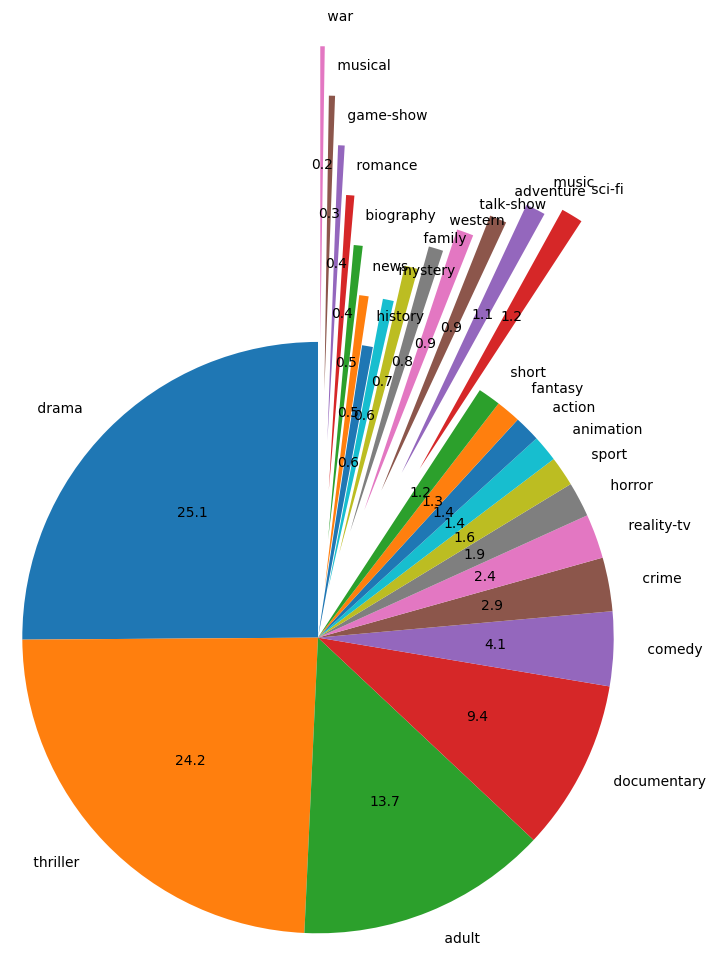

In [ ]:
plt.figure(figsize=(8,8))
values = train_df['Genre'].value_counts()
plt.pie(values, labels=output_categories, autopct='%1.1f', startangle=90, radius=1.2, explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.75, 0.65, 0.55, 0.45, 0.35, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2))
plt.show()

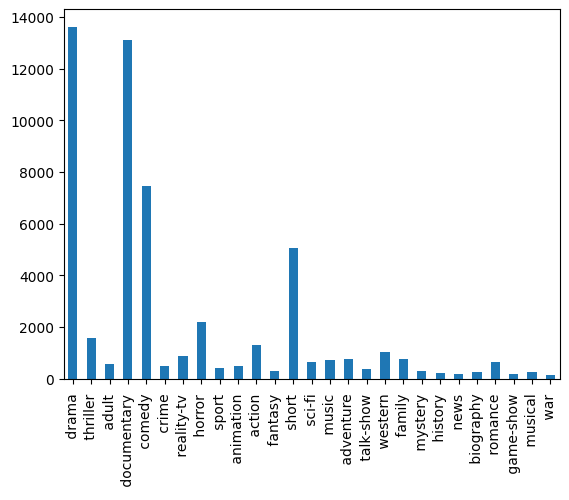

In [ ]:
# Plotting the number of counts of each genre in the training set
train_df.Genre.value_counts()[train_df.Genre.unique()].plot(kind='bar')
plt.show()

From the above two visualizations we clearly see that the data is imbalanced

In [ ]:
# Converting the Description column (Series type) to numpy array
desc = train_df['Description']
for _ in range(2):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.


<class 'numpy.ndarray'>


In [ ]:
wordnet = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    # removing special characters & numbers and just keeping alphabets
    var = re.sub("[^a-zA-Z]", " ", text)

    # lowercasing
    var = var.lower()

    var = var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # removing stopwords
    var = ' '.join(var)

    return var

In [ ]:
print(train_df['Description'][0])
t = preprocess_text(train_df['Description'][0])
print("\n>>> After processing:")
t

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.

>>> After processing:


'listening conversation doctor parent year old oscar learns nobody courage tell week live furious refuse speak anyone except straight talking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue'

In [ ]:
# Now applying the "preprocess_text" func. to the description column and adding a column which will contain the processed descriptions
train_df['Processed Description'] = train_df['Description'].apply(preprocess_text)

In [ ]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film title refers un recovered body ground zer...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white')

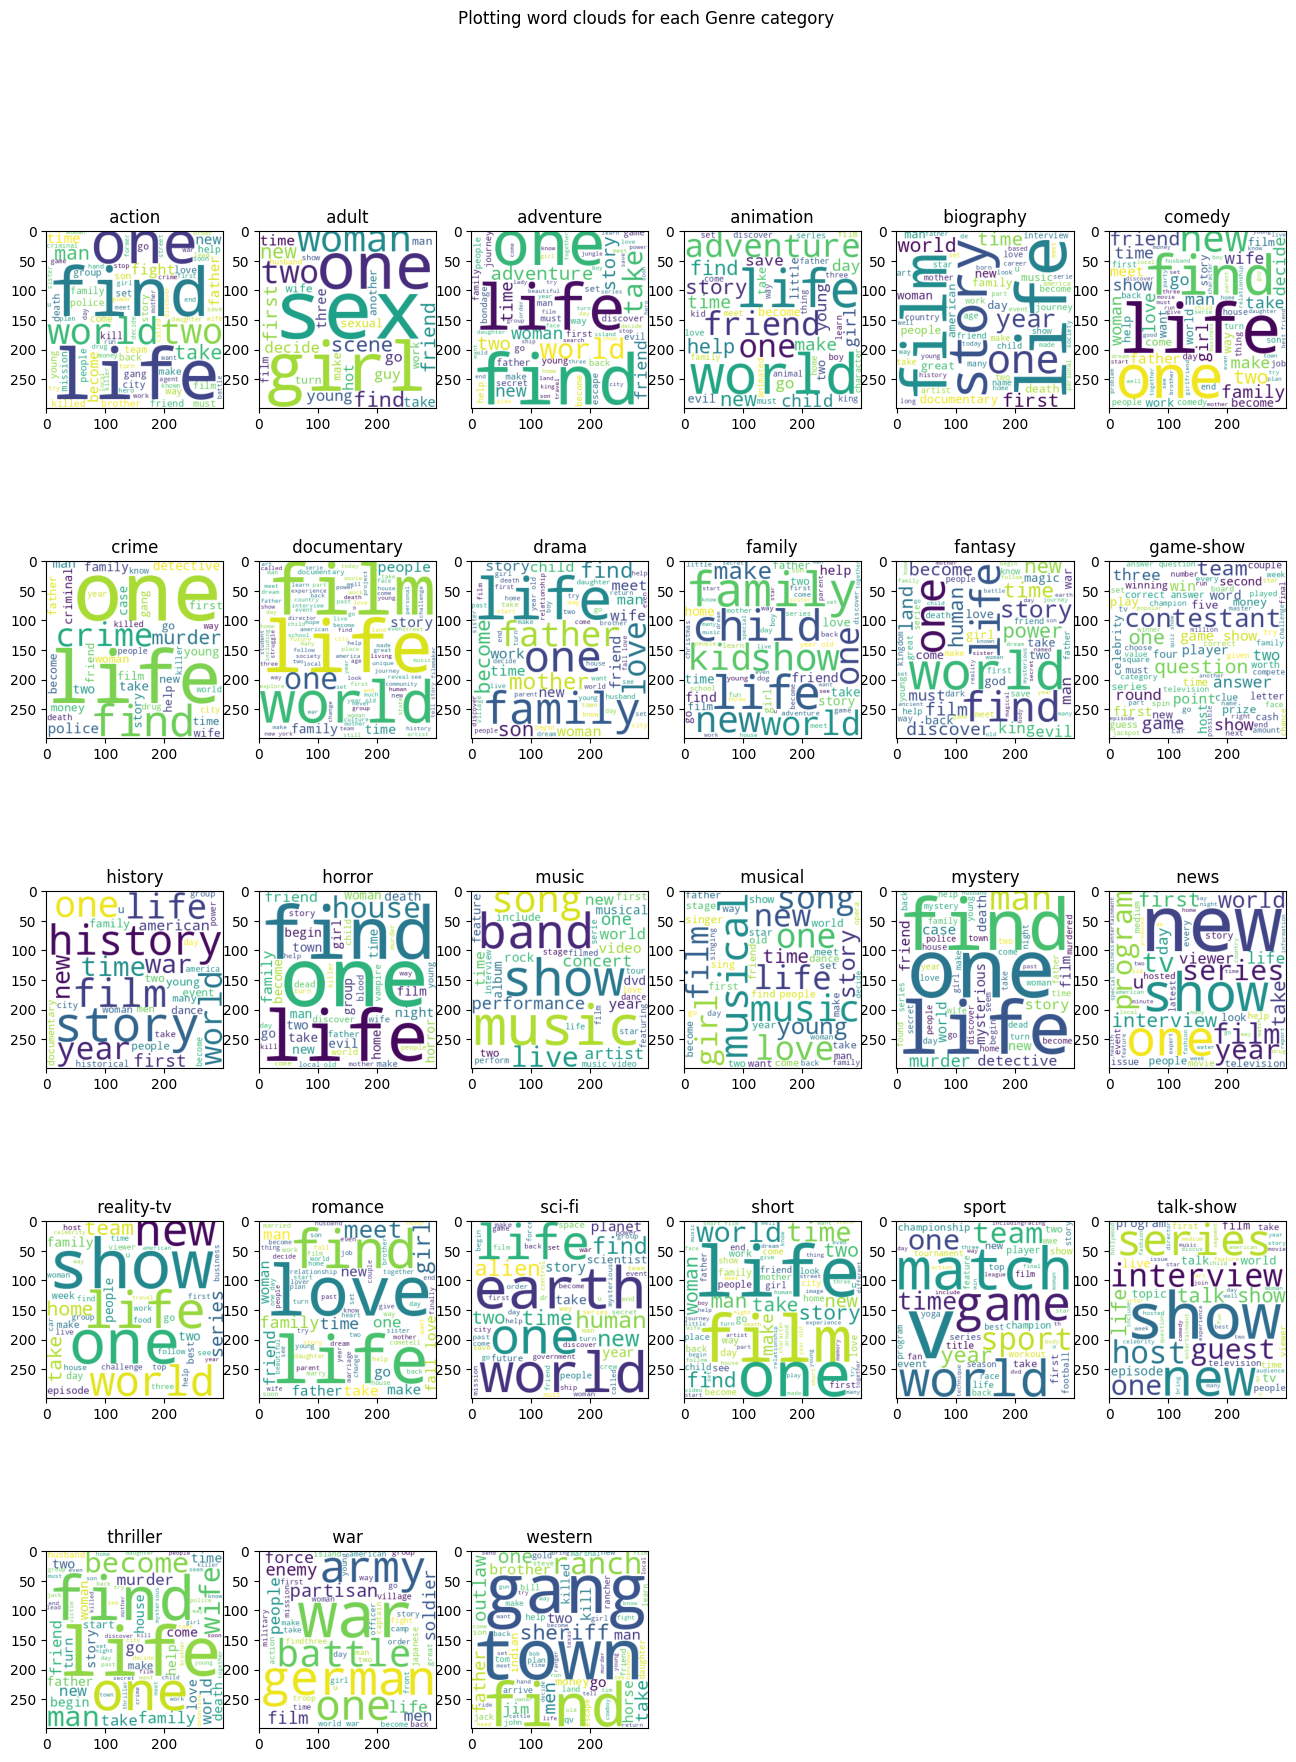

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=6,figsize=(16,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting word clouds for each Genre category')

for i in range(len(train_df['Genre'].unique())):
    ax = axs[i//6,i%6]
    cloud = wc.generate(train_df[train_df['Labeled Genre'] == i]['Processed Description'].str.cat(sep=" "))
#     plt.figure(figsize=(8,4))
    ax.imshow(cloud)
    ax.set_title(le.inverse_transform([i])[0])

# Hide any remaining empty subplots
for i in range(len(train_df['Genre'].unique()), 5*6):
    axs.flatten()[i].axis('off')

plt.show()

In [ ]:
# Now building a corpus which will be a 2d list with 27 rows one row for each genre's description corpus
corpus = []
for i in range(len(train_df['Genre'].unique())):
    corpus_i = []
    for desc in train_df[train_df['Labeled Genre'] == i]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)


# the length of corpus should be 27
print(len(corpus))

27


In [ ]:
from collections import Counter

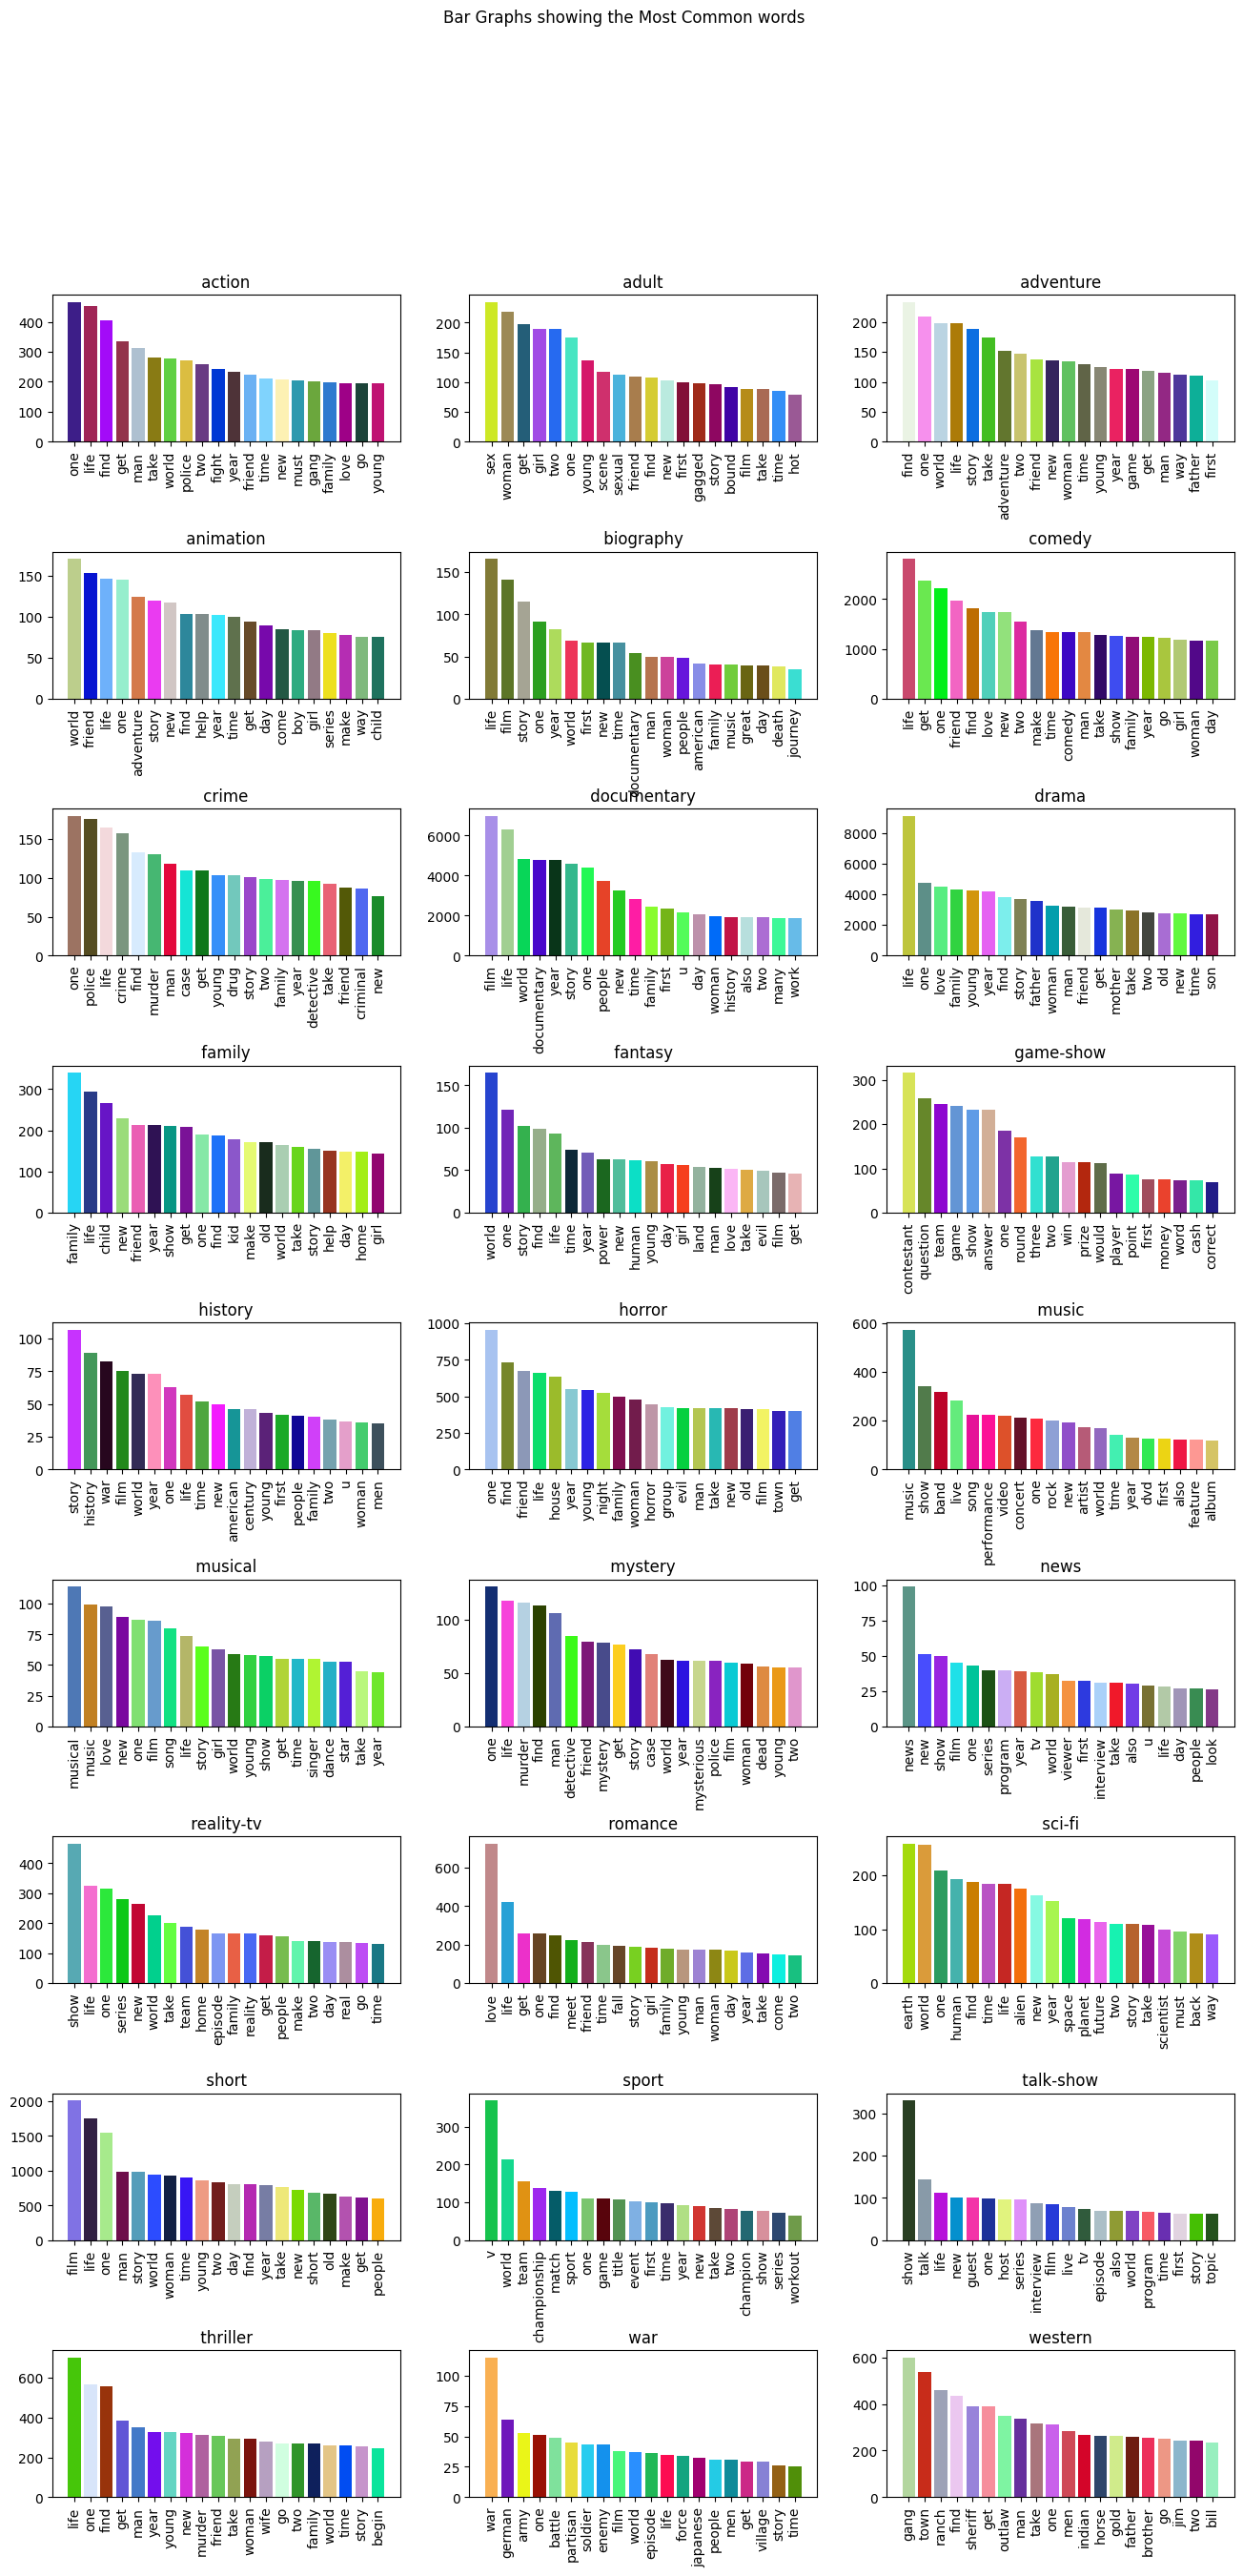

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()

# **BUILDING THE MODEL**

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# wv = api.load('word2vec-google-news-300')
# wv.save('/content/drive/MyDrive/Colab Notebooks/vectors.kv')

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/movie-genre-classification/vectors.kv')

In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)

    i = 0
    for w in sent.split():
        if w in wv:
            i += 1
            wv_res += wv[w]
    wv_res = wv_res/i
    return wv_res

In [ ]:
train_df['Vectorized'] = train_df['Processed Description'].apply(sent_vec)

In [ ]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre,Processed Description,Vectorized
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parent year old ...,"[-0.004000681751179245, -0.006050397764961675,..."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...,"[-0.027899169921875, -0.004243977864583333, 0...."
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empty student field trip museum natural hi...,"[0.07709503173828125, -0.007526397705078125, -..."
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make end meet edith twi...,"[0.023535634957107844, -0.0003737187853046492,..."
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film title refers un recovered body ground zer...,"[0.08973750361689815, 0.006486398202401621, 0...."


In [ ]:
X_train = train_df['Vectorized'].tolist()
y_train = train_df['Labeled Genre'].tolist()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
lg = LogisticRegression(multi_class='ovr')

In [ ]:
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [ ]:
train_df.columns

Index(['Id', 'Title', 'Genre', 'Description', 'Labeled Genre',
       'Processed Description', 'Vectorized'],
      dtype='object')

In [ ]:
test_sol_df['Processed Description'] = test_sol_df['Description'].apply(preprocess_text)

In [ ]:
test_sol_df['Vectorized'] = test_sol_df['Processed Description'].apply(sent_vec)

In [ ]:
test_genres = test_sol_df['Genre']
test_sol_df['Labeled Genre'] = le.transform(test_genres)
test_sol_df.head()

,Id,Title,Genre,Description,Processed Description,Vectorized,Labeled Genre
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,"[0.024899996243990384, 0.046355027418870196, -...",24
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,"[0.08577664693196614, 0.02395745479699337, 0.0...",5
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,"[0.015762617003242923, 0.06466271742334906, -0...",7
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,"[-0.0002125885527012712, 0.0666447009070445, 0...",8
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial art superstar br...,"[0.019041597173455056, 0.026341984780986656, 0...",8


In [ ]:
X_test = test_sol_df['Vectorized'].tolist()
y_test = test_sol_df['Labeled Genre'].tolist()

In [ ]:
print(len(X_test))
print(len(y_test))

54200
54200


In [ ]:
y_pred = lg.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  56.06642066420664 %
Weighted Avg Precision: 68.73074944289326 %
              precision    recall  f1-score   support

           0       0.26      0.44      0.33       760
           1       0.24      0.50      0.33       287
           2       0.10      0.45      0.16       168
           3       0.04      0.35      0.08        63
           4       0.00      0.00      0.00         0
           5       0.57      0.52      0.55      8071
           6       0.03      0.35      0.06        46
           7       0.83      0.63      0.72     17271
           8       0.76      0.52      0.62     19795
           9       0.08      0.44      0.13       135
          10       0.04      0.41      0.08        34
          11       0.47      0.86      0.61       106
          12       0.00      0.00      0.00         0
          13       0.54      0.59      0.56      2034
          14       0.46      0.64      0.53       519
          15       0.00      0.14      0.01         7
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = gnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  34.02952029520295 %
Weighted Avg Precision: 39.577552993174635 %
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       981
           1       0.52      0.23      0.32      1298
           2       0.14      0.14      0.14       786
           3       0.23      0.16      0.19       739
           4       0.18      0.03      0.06      1372
           5       0.21      0.53      0.30      2934
           6       0.37      0.10      0.15      1935
           7       0.37      0.69      0.48      7058
           8       0.37      0.57      0.45      8917
           9       0.11      0.16      0.13       553
          10       0.30      0.09      0.14      1035
          11       0.70      0.34      0.46       403
          12       0.28      0.05      0.08      1389
          13       0.51      0.43      0.47      2600
          14       0.73      0.30      0.43      1761
          15       0.19      0.06      0.09       885
     

In [ ]:
y_pred = bnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"%")
print("Weighted Avg Precision:", precision_score(y_pred, y_test, average='weighted')*100,"%")
print(classification_report(y_pred,y_test))

Accuracy:  37.108856088560884 %
Weighted Avg Precision: 39.157566010307434 %
              precision    recall  f1-score   support

           0       0.23      0.24      0.24      1247
           1       0.45      0.23      0.31      1139
           2       0.11      0.15      0.13       574
           3       0.17      0.15      0.16       544
           4       0.13      0.03      0.05      1151
           5       0.29      0.46      0.36      4716
           6       0.31      0.12      0.17      1367
           7       0.41      0.66      0.51      8131
           8       0.46      0.54      0.50     11467
           9       0.11      0.20      0.14       422
          10       0.26      0.10      0.15       803
          11       0.66      0.35      0.46       365
          12       0.28      0.05      0.09      1225
          13       0.48      0.42      0.45      2543
          14       0.72      0.27      0.39      1988
          15       0.17      0.06      0.09       797
    

***Result***
---
Among the three classification reports of LogisticRegression, GaussianNB and BernoulliNB models, we see that LogisticRegression has the best performance.
---



